# Problem 1: Singular Value Decomposition and Eigenfaces

In [1]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
# Please upload the attface.zip file to the workspace first.
# Refer to the canvas assignment page for a quick guide on how to do upload it.
faces = {}
# load the images dataset
with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # opencv load the filename files
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

faceimages = np.asarray(list(faces.values())[0:400:2])
faceimages_test = np.asarray(list(faces.values())[1:401:2])
print(faceimages.shape)
print(faceimages_test.shape)
# 3d stands for (index,height,width)
# To make it clear:
# faceimages is a 3d array where the first index is to index the images
# Second and third are to index the image height and width directions.

def plot_single_face(img):
  img_arr = np.reshape(img, (112, 92))
  plt.figure()
  plt.imshow(img_arr, cmap='gray')
  plt.show()



(200, 112, 92)
(200, 112, 92)


## Problem 1.1 Constructing the face-image matrix


### $\color{red}{\text{>Important!!!! The following code block is an example for reshaping the the first image into a column vector.<}}$

[[48]
 [49]
 [45]
 ...
 [47]
 [46]
 [46]]


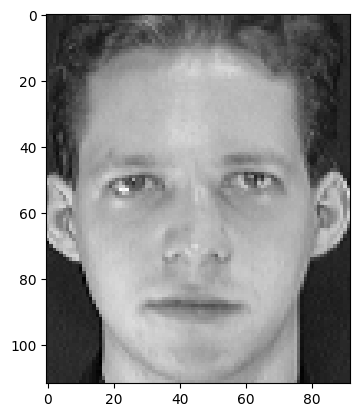

In [2]:
# Check this code! You need to utilize it in your loop for problem 3.1!!!
row_vect = faceimages[[0],:,:] # Take out the 0th face image
col_vect = row_vect.reshape((10304,1))
print(col_vect)
plot_single_face(col_vect)

(10304, 200)


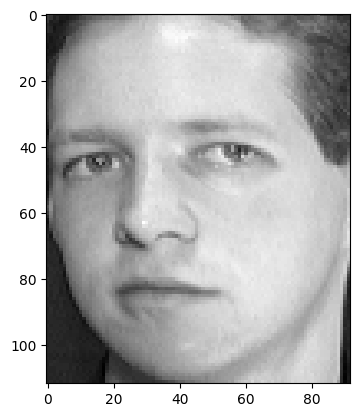

In [3]:
# The shape of faceimages are (200, 112, 92)
# where faceimage[i, :, :] is the i-th face image.
# Please generate the matrix A whose size is (10304, 200) according to face image
# The column vectors of matrix A will stands for the face images.

# Here you can reshape the 3-D array directly followed by a transpose operation
# if you're comfortable with multi-dimensional reshaping operations,
# OR
# you can generate A by writing a for loop [Recommended] (112*92 = 10304)
# please make sure each colums of A represents a face image

########################Your codes start here ###############################
# A = ????
A = np.zeros((10304, 200))

for i in range(200):
    A[:, i] = faceimages[i, :, :].reshape(10304)
# print the shape of the matrix A you generated
print(A.shape)
##############################################################################
plot_single_face(A[:, 2]) # Make sure the plot is a human face

## 1.2 PCA on the face-image matrix

In [4]:
def plot_eigenface(B_hat):
  k = B_hat.shape[1]
  fig, axes = plt.subplots(5,4,sharex=True,sharey=True,figsize=(8,10))
  for i in range(k):
    img_tmp = np.reshape(B_hat[:, i], (112, 92))
    axes[i//4][i%4].imshow(img_tmp, cmap="gray")
  plt.show()

In [5]:
# Step(a) center the face-image matrix A according to equation(7) on Page 6
###########################Your codes start here############################
# A_bar = ?? # centered A
mean_vector = np.mean(A, axis=1, keepdims=True)
A_bar = A - mean_vector
#############################################################################

In [6]:
# Step(b) Perform SVD on A_bar
# This step may take up to 1 min or longer, please be patient to wait.
################Your codes start here########################################

# U, sigma, V_T = ?????
U, sigma, V_T = np.linalg.svd(A_bar, full_matrices=False)
# print(U.shape, sigma.shape, V_T.shape)
print(U.shape, sigma.shape, V_T.shape)
#############################################################################

(10304, 200) (200,) (200, 200)


In [7]:
# Step (c) Using the top k=20 principal components to contruct B_hat and W_hat
# in equation (9) on Page 7
# Hint: Please use np.diag to generate a diagonal matrix if you don't know
# how to generate \Sigma matrix based on eigenvalues (sigma)
################Your codes start here########################################

# B_hat = ?????
k = 20
U_k = U[:, :k]
Sigma_k = np.diag(sigma[:k])

V_T_k = V_T[:k, :]

B_hat = U_k

# W_hat = ?????? # Both B_hat and W_hat are from eq (9) on Page 7
W_hat = Sigma_k @ V_T_k
# print(B_hat.shape, W_hat.shape) # Please check the dimensions
print(B_hat.shape, W_hat.shape)
# according to equation (9)
#############################################################################

(10304, 20) (20, 200)


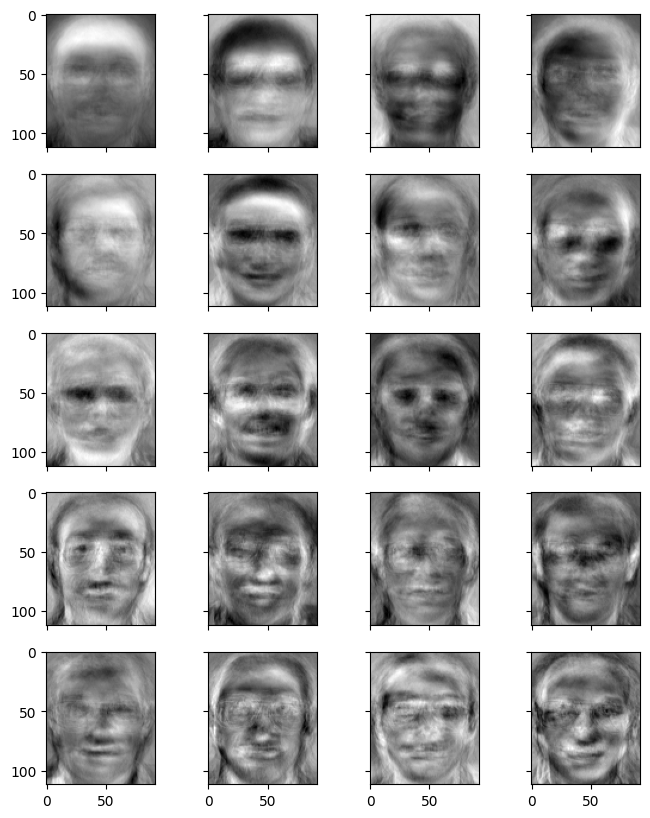

In [8]:
# Step (d) Plot the B_hat components
plot_eigenface(B_hat)

## Problem 1.3 Face recognition based on eigenfaces

In [9]:
def visualize_recognition(ind, test_img, faceimages):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(np.squeeze(test_img, axis=0), cmap="gray") # Updated here
  plt.subplot(1, 2, 2)
  best_match = faceimages[ind, :, :]
  plt.imshow(best_match, cmap="gray")
  plt.show()

In [10]:
# Here are 3 test images
test_img1 = faceimages_test[[15], :, :]
test_img2 = faceimages_test[[35], :, :]
test_img3 = faceimages_test[[75], :, :]

In [13]:
# Step(a) Vectorize 3 test images
###########################Your codes start here############################
# z_1 = ??  #vectorize test_img1
z_1 = test_img1.reshape(10304, 1)
# z_2 = ??  #vectorize test_img2
z_2 = test_img2.reshape(10304, 1)
# z_3 = ??  #vectorize test_img3
z_3 = test_img3.reshape(10304, 1)
#############################################################################

In [14]:
# Step (b) Center each of the 3 vectors according to equation (10)
###########################Your codes start here############################
mean_face = np.mean(A, axis=1, keepdims=True)
# z_1_bar = ??  # center z_1
z_1_bar = z_1 - mean_face
# z_2_bar = ??  # center z_2
z_2_bar = z_2 - mean_face
# z_3_bar = ??  # center z_3
z_3_bar = z_3 - mean_face
#############################################################################

In [15]:
# Step (c) Compute the representations of the 3 vectors with respect to the B_hat
# according to equation (11)
###########################Your codes start here############################
# w_1 = ??  # caculate according to z_1_bar and B_hat
w_1 = B_hat.T @ z_1_bar
# w_2 = ??  # caculate according to z_2_bar and B_hat
w_2 = B_hat.T @ z_2_bar
# w_3 = ??  # caculate according to z_3_bar and B_hat
w_3 = B_hat.T @ z_3_bar
#############################################################################

In [16]:
# Step (d) for each corresponding vector for the 3 test images,
# find its nearest neighbor in the training set: faceimages .
###########################Your codes start here############################
distances_1 = np.linalg.norm(W_hat - w_1, axis=0)
distances_2 = np.linalg.norm(W_hat - w_2, axis=0)
distances_3 = np.linalg.norm(W_hat - w_3, axis=0)
# ind_1 = ??  # find the index of the nearest neighbour according to w_1 and W_hat
ind_1 = np.argmin(distances_1)
# ind_2 = ??  # find the index of the nearest neighbour according to w_2 and W_hat
ind_2 = np.argmin(distances_2)
# ind_3 = ??  # find the index of the nearest neighbour according to w_3 and W_hat
ind_3 = np.argmin(distances_3)
#############################################################################

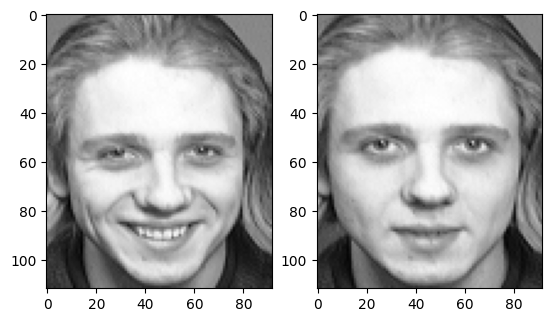

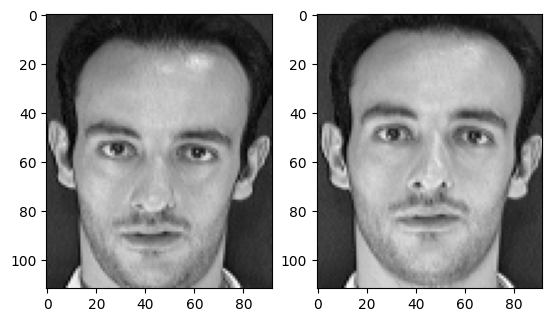

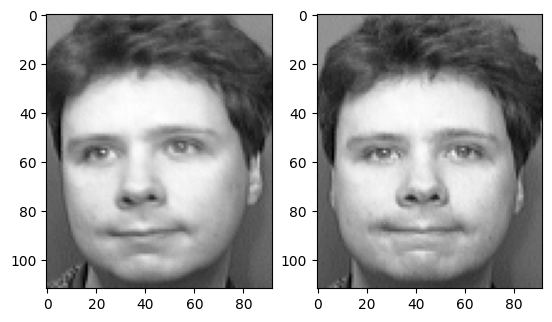

In [17]:
visualize_recognition(ind_1, test_img1, faceimages)
visualize_recognition(ind_2, test_img2, faceimages)
visualize_recognition(ind_3, test_img3, faceimages)

# 1.4 (Extra Credit) Image compression using the SVD

In [18]:
# function that plots an image that is in a 2D array format
def visualize_rec_img(img):
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.show()

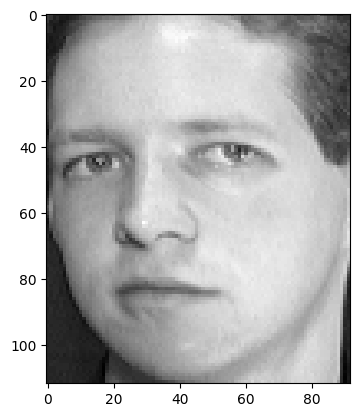

In [19]:
# image we want to compress
img = np.reshape(A[:,2], (112,92))
visualize_rec_img(img)

##Compressing the images and visualizing them

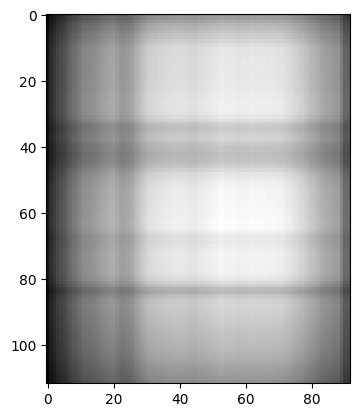

Compression using 1 singular values uses 205 entries.


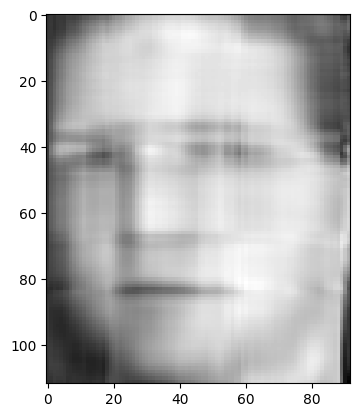

Compression using 5 singular values uses 1045 entries.


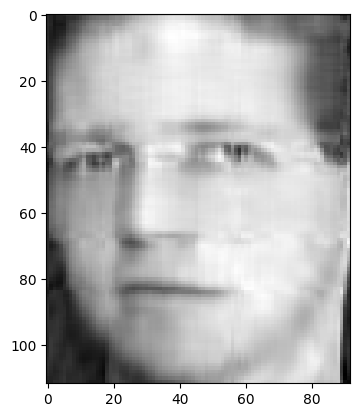

Compression using 10 singular values uses 2140 entries.


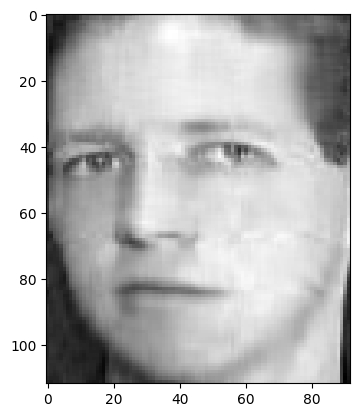

Compression using 15 singular values uses 3285 entries.


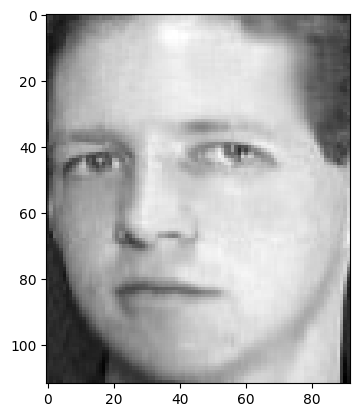

Compression using 20 singular values uses 4480 entries.


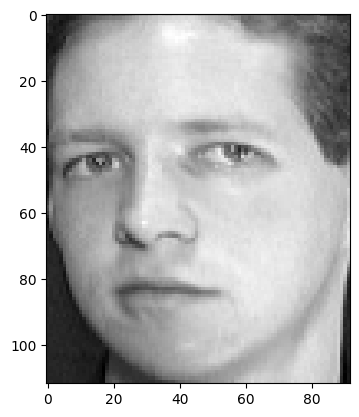

Compression using 40 singular values uses 9760 entries.


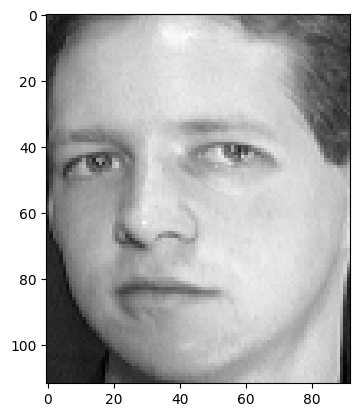

Compression using 92 singular values uses 27232 entries.


In [21]:
# the number of singular values and vectors we want to look at
# to compare the different image compressions
num_singular_values = [1,5,10,15,20,40,92]
compressed_imgs = []
entries_stored = []

# compare the outputs of the different compressions
for k in num_singular_values:
  compressed_img = np.zeros(img.shape)
#################### TODO: your code starts here ##################
for k in num_singular_values:
    U, sigma, V_T = np.linalg.svd(img, full_matrices=False)

    U_k = U[:, :k]
    sigma_k = np.diag(sigma[:k])
    V_T_k = V_T[:k, :]

    compressed_img = U_k @ sigma_k @ V_T_k
    compressed_imgs.append(compressed_img)
    entries_stored.append(U_k.size + sigma_k.size + V_T_k.size)

    visualize_rec_img(compressed_img)

    print(f"Compression using {k} singular values uses {entries_stored[-1]} entries.")

###################################################################




Compression using largest 1 singular values:



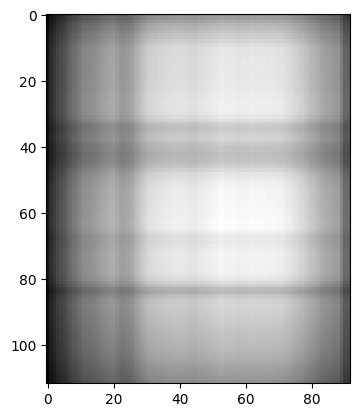




Compression using largest 5 singular values:



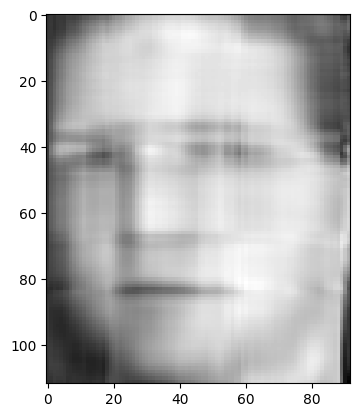




Compression using largest 10 singular values:



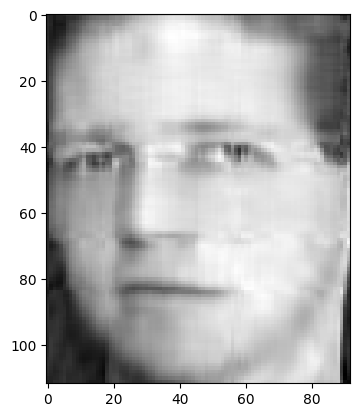




Compression using largest 15 singular values:



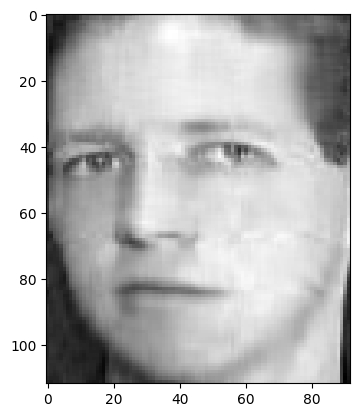




Compression using largest 20 singular values:



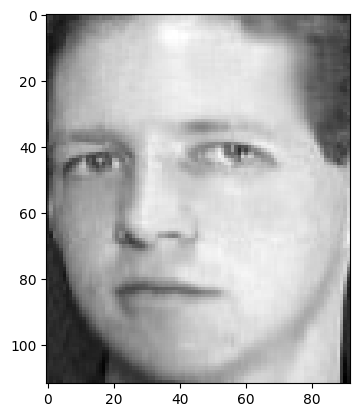




Compression using largest 40 singular values:



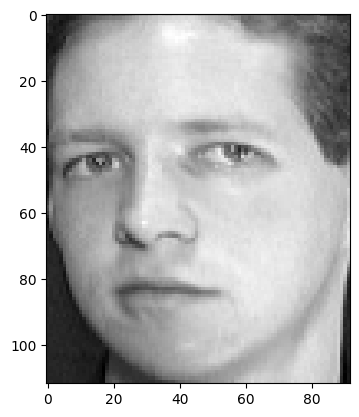




Compression using largest 92 singular values:



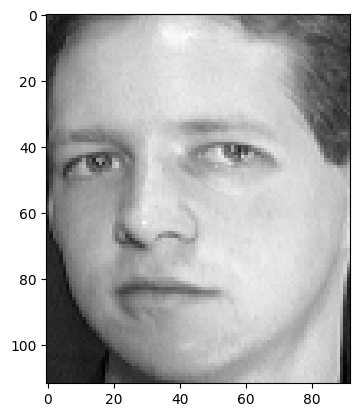

In [22]:
for i in range(len(compressed_imgs)):
  print(f"\n\n\nCompression using largest {num_singular_values[i]} singular values:\n")
  visualize_rec_img(compressed_imgs[i])

## TODO:
### What do you observe about the way the image looks with respect to the how many of the largest singular values and their respective singular vectors we use to reconstruct it? What information seems to be carried by the largest singular values and their respective singular vectors and what seems to be carried by the smallest singular values and their respective vectors?


During compression of an image employing Singular Value Decomposition (SVD) the first few singular values convey the overall shape of the image, large contrast in tones and basic structures. By using more singular values in reconstruction the image is reconstructed closer to the original, keeping most significant characteristics intact. On the other hand, the smallest singular values refer to details, texture, and noise, present in the signal. These values add less to the picture, and if allowed to be eliminated the resulting image is less distinct, hazy, and the details apparent are few. Therefore, this Construction gives to the largest singular values the important structural information, giving to the small singular values the fine details and noise.

### Comparing storage for different the compressed images with respect to how many of the largest singular values and their respective singular vectors are used to reconstruct the image.

In [23]:
for i in range(len(num_singular_values)):
  print(f"Entries stored for compression using {num_singular_values[i]} largest singular values: {entries_stored[i]}")

Entries stored for compression using 1 largest singular values: 205
Entries stored for compression using 5 largest singular values: 1045
Entries stored for compression using 10 largest singular values: 2140
Entries stored for compression using 15 largest singular values: 3285
Entries stored for compression using 20 largest singular values: 4480
Entries stored for compression using 40 largest singular values: 9760
Entries stored for compression using 92 largest singular values: 27232


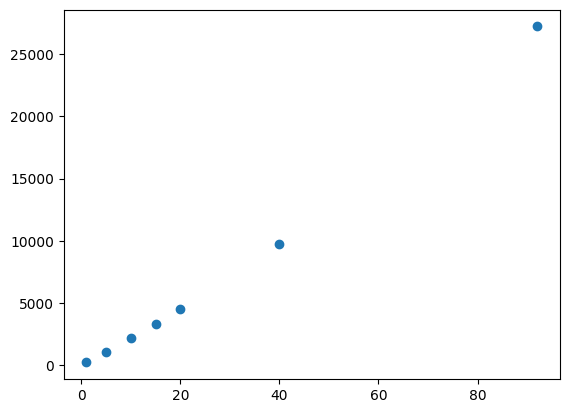

In [24]:
# plot number of singular values vs storage
plt.figure()
plt.scatter(num_singular_values, entries_stored)
plt.show()

## TODO:
### What kind of relationship do you think exist between the number of entries stored and the number of singular values used to reconstruct the image?



Thus the direct proportionality between the number of entries stored and number of singular values used to reconstruct image is observed. When more of the singular values are used, more entries are needed for compression because each singular value is the number of the vectors in the matrices U and V^T
 .I also came across the term <index> <ai> for the first time and these important singular values of the matrix. This means that how ever many singular values exist, data is stored in multiples of that to enhance the image quality and would have fewer singular values mean that storage is less but the image detail is degraded.

### Choosing the compressed image

Original image: 


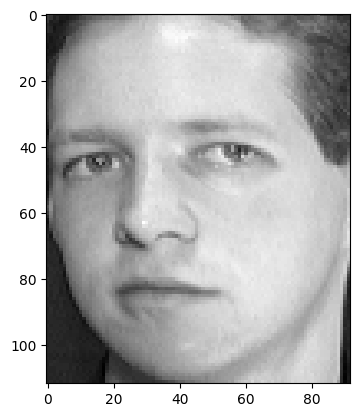



Chosen compressed image:


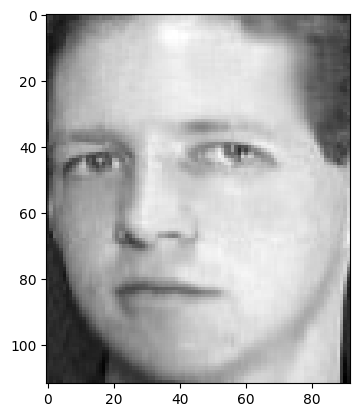



Storage space used relative to the original image 43%


In [25]:
chosen_k = 92
########### TODO: your code here ############
# pick a value of k from the list [1,5,10,15,20,40,92]
# that seems to give a good reconstruction
# of the image but saves you a significant amount of space in storage

# chosen_k =
chosen_k = 20
#############################################

index = num_singular_values.index(chosen_k)
print("Original image: ")
visualize_rec_img(img)
print("\n\nChosen compressed image:")
visualize_rec_img(compressed_imgs[index])
print(f"\n\nStorage space used relative to the original image {100*(entries_stored[index]/(112*92)):.0f}%")